# Most Demanded Skills for Popular Data Roles in US/Canada (My Try)

In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

In [47]:
my_df = df[df['job_country'].isin(['United States','Canada'])]
df_exploded = my_df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
job_titles = ['Data Scientist','Data Engineer','Data Analyst', 'Business Analyst']

In [50]:
df_skills_count
df_job_title_count = my_df['job_title_short'].value_counts().reset_index(name='jobs_total')
df_merged = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_merged['skill_perc']=df_merged['skill_count']/df_merged['jobs_total']*100
df_merged

,job_title_short,job_skills,skill_count,jobs_total,skill_perc
0,Data Scientist,python,43497,60655,71.712142
1,Data Analyst,sql,35691,70181,50.855645
2,Data Scientist,sql,30940,60655,51.009810
3,Data Analyst,excel,28282,70181,40.298656
4,Data Engineer,sql,27752,40908,67.840031
...,...,...,...,...,...
1946,Business Analyst,dplyr,1,8491,0.011777
1947,Business Analyst,debian,1,8491,0.011777
1948,Business Analyst,dart,1,8491,0.011777
1949,Business Analyst,cordova,1,8491,0.011777


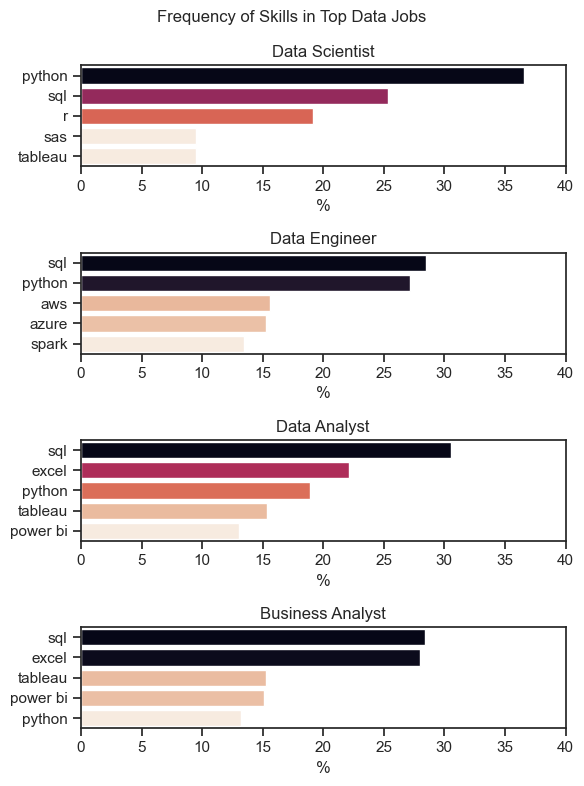

In [26]:
fig, ax = plt.subplots(4, 1,figsize=(6,8))
sns.set_theme(style='darkgrid')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head()
    total = df_plot['skill_count'].sum()
    df_plot['percent'] = df_plot['skill_count']/total*100
    #df_plot.plot(kind='barh',x='job_skills',y='percent',ax=ax[i], title=job_title)
    sns.barplot(data=df_plot,x='percent',y='job_skills',ax=ax[i],hue='percent',palette='rocket_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('%')
    ax[i].set_xlim(0,40)
    ax[i].legend().set_visible(False)
    fig.tight_layout()
    fig.suptitle('Frequency of Skills in Top Data Jobs', fontsize=12)

# Most Demanded Skills for Popular Data Roles (Tutorial)

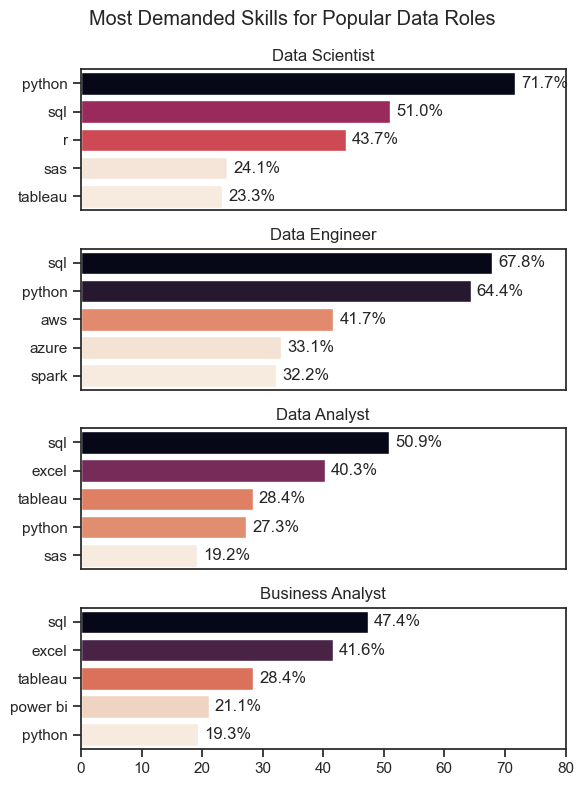

In [72]:
fig, ax = plt.subplots(len(job_titles), 1,figsize=(6,8))
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot_2 = df_merged[df_merged['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot_2,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_perc',palette='rocket_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)
    for n, v in enumerate(df_plot_2['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.1f}%', va ='center',fontsize=12)
    if i != len(job_titles)-1:
        ax[i].set_xticks([])


fig.suptitle('Most Demanded Skills for Popular Data Roles')
fig.tight_layout()